In [ ]:
from msmbuilder.example_datasets import QuadWell
trajs = QuadWell().get().trajectories
print("Trajectories:", len(trajs))
print("Each trajectory is of shape: ", set(traj.shape for traj in trajs))

Trajectories: 100
Each trajectory is of shape:  {(1001, 1)}


In [ ]:
from IPython import get_ipython
ipython = get_ipython()

def plot():
    ipython.magic('matplotlib inline')
    from matplotlib import pyplot
    #import matplotlib
    #matplotlib.rcParams['svg.fonttype'] = 'none'
    import seaborn
    seaborn.set(style='ticks', palette='colorblind')
    return pyplot, seaborn, seaborn.color_palette()

def axes(figsize=(6,5)):
    from matplotlib import pyplot as plt
    import seaborn as sns
    fig, ax = plt.subplots(figsize=figsize)
    return fig, ax

def draw(drawfunc, xlabel=None, ylabel=None, figsize=None):
    if figsize is None:
        figsize = (7,5)
    from matplotlib import pyplot as plt
    import seaborn as sns
    fig, ax = plt.subplots(figsize=figsize)
    drawfunc(ax)
    if xlabel:
        ax.set_xlabel(xlabel, fontsize=18)
    if ylabel:
        ax.set_ylabel(ylabel, fontsize=18)
    fig.tight_layout()
    
    return fig, ax
    

In [ ]:
import numpy as np

In [ ]:
plt, sns, colors = plot()

## The potential

Let's see what our potential looks like and what our equilibrium distribution looks like (as esimated from data). There are four wells. The equilibrium probability of being in each well is inversely proportional to the energy of the well.

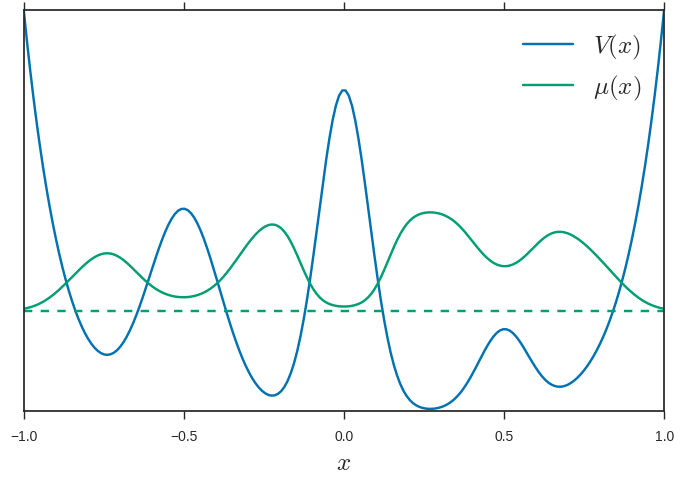

In [ ]:
def plot_quadwell(ax):
    xx = np.linspace(-1,1, 200)
    ax.plot(xx, QuadWell().potential(xx), label=r'$V(x)$', color=colors[0])
    #ax.hist(np.concatenate(trajs), bins=50, normed=True, label=r'$\hat{\mu}(x)$', color=colors[1], alpha=0.8)
    ax.plot(xx, np.exp(-QuadWell().potential(xx))+1, color=colors[1], label=r'$\mu(x)$')
    ax.axhline(1, color=colors[1], ls='--')
    ax.legend(loc='upper right', fontsize=18)
    ax.set_yticks([])
    ax.set_xlim(-1, 1)
    ax.set_ylim(0, 4)
    
fig, ax = draw(plot_quadwell, r'$x$')
fig.savefig("equilibrium.pdf")

## The dynamics

In [ ]:
from msmbuilder.example_datasets.brownian1d import _brownian_transmat, QUADWELL_GRAD_POTENTIAL
from msmbuilder.msm import _solve_msm_eigensystem

In [ ]:
transmat = _brownian_transmat(200, 1, QUADWELL_GRAD_POTENTIAL, -1.2, 1.2, reflect_bc=False)
vals, lvevs, rvevs = _solve_msm_eigensystem(transmat, k=2)

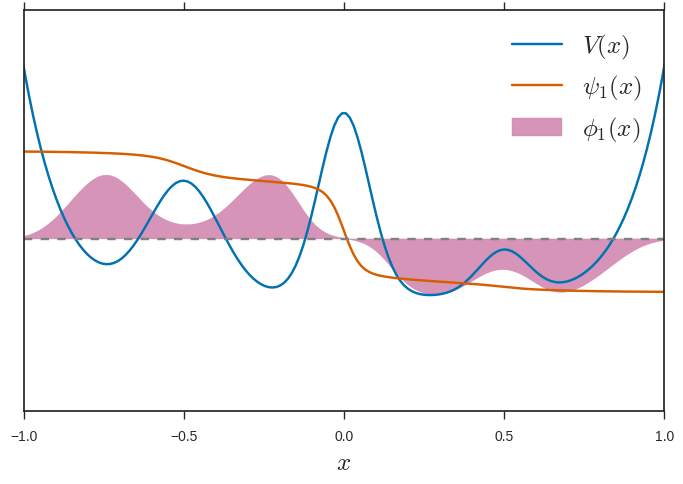

In [ ]:
def plot_quadwell(ax, n=200, lag_time=1, xmin=-1.2, xmax=1.2):
    xx = np.linspace(xmin, xmax, n)
    transmat = _brownian_transmat(n, lag_time, QUADWELL_GRAD_POTENTIAL, xmin, xmax, reflect_bc=False)
    vals, lvecs, rvecs = _solve_msm_eigensystem(transmat, k=2)
    ax.plot(xx, QuadWell().potential(xx)- 1, label=r'$V(x)$', color=colors[0])
    # Normalization for lvecs: <p p>_{u^-1} = 1 ... too small for plots!
    ax.fill_between(xx, 100*lvecs[:,1], label=r'$\phi_1(x)$', color=colors[3], alpha=0.8)
    ax.plot(xx, rvecs[:,1], label=r'$\psi_1(x)$', color=colors[2])
    
    ax.axhline(0, color='grey', ls='--')
    ax.legend(loc='upper right', fontsize=18)
    ax.set_yticks([])
    ax.set_xlim(-1,1)
    ax.set_ylim(-3, 4)
    
fig, ax = draw(plot_quadwell, r'$x$')
fig.savefig("transfer-vs-prop.pdf")

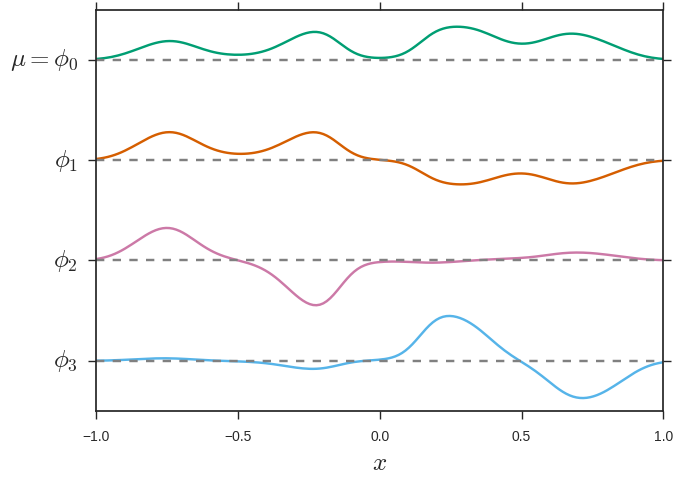

In [ ]:
def plot_quadwell(ax, n=200, lag_time=1, xmin=-1.2, xmax=1.2):
    xx = np.linspace(xmin, xmax, n)
    transmat = _brownian_transmat(n, lag_time, QUADWELL_GRAD_POTENTIAL, xmin, xmax, reflect_bc=False)
    vals, lvecs, rvecs = _solve_msm_eigensystem(transmat, k=4)
    #ax.plot(xx, QuadWell().potential(xx)- 1, label=r'$V(x)$')
    # Normalization for lvecs: <p p>_{u^-1} = 1 ... too small for plots!
    
    spacing=4
    ax.plot(xx, 100*lvecs[:,0], label=r'$\psi_1(x)$', color=colors[1])
    ax.plot(xx, 100*lvecs[:,1]-1*spacing, label=r'$\psi_1(x)$', color=colors[2])
    ax.plot(xx, 100*lvecs[:,2]-2*spacing, label=r'$\psi_2(x)$', color=colors[3])
    ax.plot(xx, 100*lvecs[:,3]-3*spacing, label=r'$\psi_3(x)$', color=colors[5])
    
    ax.axhline(0, color='grey', ls='--')
    ax.axhline(-1*spacing, color='grey', ls='--')
    ax.axhline(-2*spacing, color='grey', ls='--')
    ax.axhline(-3*spacing, color='grey', ls='--')
    
    #ax.legend(loc='upper right', fontsize=18)
    ax.set_yticks([0, -1*spacing, -2*spacing, -3*spacing])
    ax.set_yticklabels([r'$\mu = \phi_0$', r'$\phi_1$', r'$\phi_2$', r'$\phi_3$'], fontsize=18)
    ax.set_xlim(-1,1)
    ax.set_ylim(-3.5*spacing, 2)
    
fig, ax = draw(plot_quadwell, r'$x$')
fig.savefig("prop-eigs.pdf")

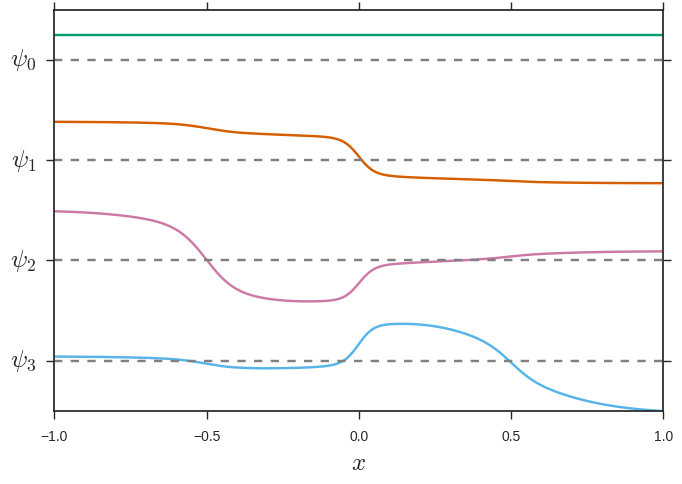

In [ ]:
def plot_quadwell(ax, n=200, lag_time=1, xmin=-1.2, xmax=1.2):
    xx = np.linspace(xmin, xmax, n)
    transmat = _brownian_transmat(n, lag_time, QUADWELL_GRAD_POTENTIAL, xmin, xmax, reflect_bc=False)
    vals, lvecs, rvecs = _solve_msm_eigensystem(transmat, k=4)
    #ax.plot(xx, QuadWell().potential(xx)- 1, label=r'$V(x)$')
    # Normalization for lvecs: <p p>_{u^-1} = 1 ... too small for plots!
    
    spacing=4
    ax.plot(xx, rvecs[:,0], label=r'$\psi_1(x)$', color=colors[1])
    ax.plot(xx, rvecs[:,1]-1*spacing, label=r'$\psi_1(x)$', color=colors[2])
    ax.plot(xx, rvecs[:,2]-2*spacing, label=r'$\psi_2(x)$', color=colors[3])
    ax.plot(xx, rvecs[:,3]-3*spacing, label=r'$\psi_3(x)$', color=colors[5])
    
    ax.axhline(0, color='grey', ls='--')
    ax.axhline(-1*spacing, color='grey', ls='--')
    ax.axhline(-2*spacing, color='grey', ls='--')
    ax.axhline(-3*spacing, color='grey', ls='--')
    
    #ax.legend(loc='upper right', fontsize=18)
    ax.set_yticks([0, -1*spacing, -2*spacing, -3*spacing])
    ax.set_yticklabels([r'$\psi_0$', r'$\psi_1$', r'$\psi_2$', r'$\psi_3$'], fontsize=18)
    ax.set_xlim(-1,1)
    ax.set_ylim(-3.5*spacing, 2)
    
fig, ax = draw(plot_quadwell, r'$x$')
fig.savefig("transfer-eigs.pdf")